In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Filtres RIF


**Méthode de fenêtrage**

Cette technique implique la multiplication de la réponse impulsionnelle idéale d'un filtre par une fonction fenêtre pour obtenir une réponse impulsionnelle réalisable et causal.


1- Réponse en fréquence d'un filtre passe-bas idéal

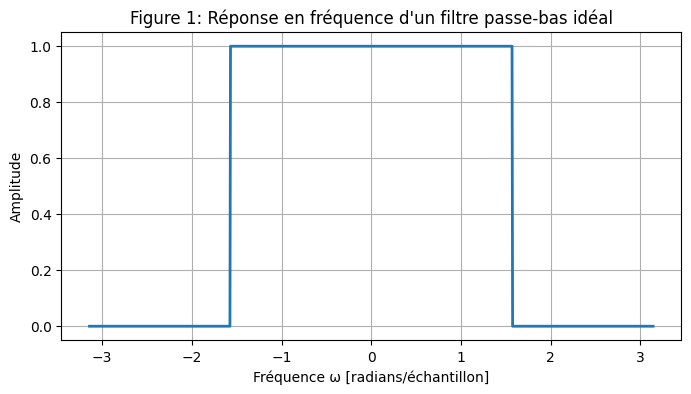

In [2]:
# Définition de la gamme de fréquences
omega = np.linspace(-np.pi, np.pi, 1000)
omega_c = np.pi / 2  # Fréquence de coupure

# Réponse en fréquence idéale
H_d = np.where(np.abs(omega) <= omega_c, 1, 0)

# Tracé
plt.figure(figsize=(8, 4))
plt.plot(omega, H_d, linewidth=2)
plt.title('Figure 1: Réponse en fréquence d\'un filtre passe-bas idéal')
plt.xlabel('Fréquence ω [radians/échantillon]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Réponse impulsionnelle correspondante





<ipython-input-3-e99f428086ca>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h_d, use_line_collection=True)


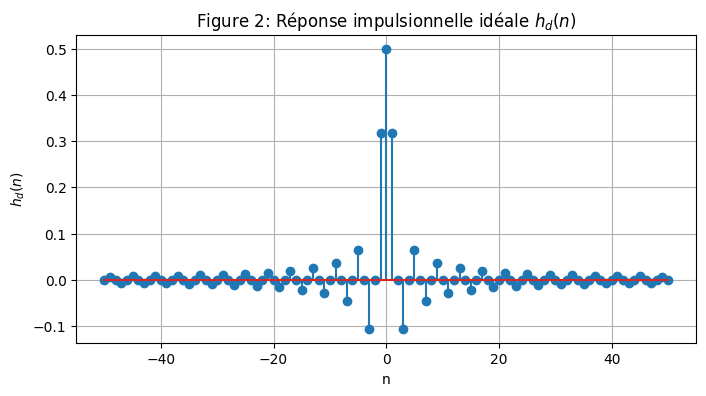

In [3]:
# Indice temporel n
n = np.arange(-50, 51)
omega_c = np.pi / 2  # Fréquence de coupure

# Calcul de h_d(n)
h_d = np.zeros_like(n, dtype=float)
h_d[n != 0] = np.sin(omega_c * n[n != 0]) / (np.pi * n[n != 0])
h_d[n == 0] = omega_c / np.pi

# Tracé
plt.figure(figsize=(8, 4))
plt.stem(n, h_d, use_line_collection=True)
plt.title('Figure 2: Réponse impulsionnelle idéale $h_d(n)$')
plt.xlabel('n')
plt.ylabel('$h_d(n)$')
plt.grid(True)
plt.show()

Multiplication de h_d(n) par une fenêtre w(n)

<ipython-input-4-978f2cfe160e>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h, use_line_collection=True)


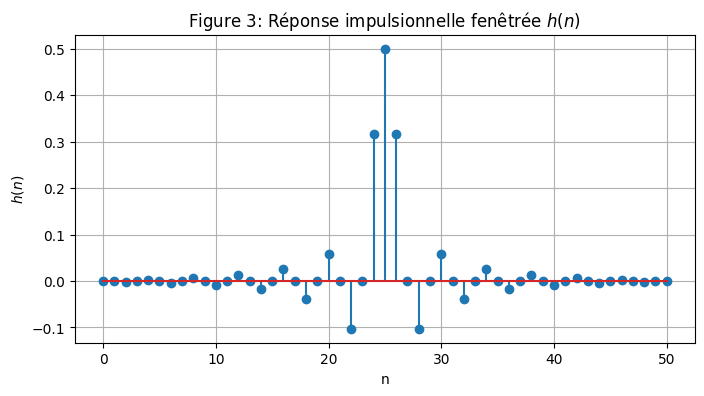

In [4]:
# Paramètres
N = 51  # Longueur de la fenêtre
n = np.arange(N)
omega_c = np.pi / 2

# Indice centré
alpha = (N - 1) / 2
n_shifted = n - alpha

# Réponse impulsionnelle idéale centrée
h_d = np.zeros_like(n_shifted)
h_d[n_shifted != 0] = np.sin(omega_c * n_shifted[n_shifted != 0]) / (np.pi * n_shifted[n_shifted != 0])
h_d[n_shifted == 0] = omega_c / np.pi

# Fenêtre de Hamming
w = 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))

# Réponse impulsionnelle fenêtrée
h = h_d * w

# Tracé
plt.figure(figsize=(8, 4))
plt.stem(n, h, use_line_collection=True)
plt.title('Figure 3: Réponse impulsionnelle fenêtrée $h(n)$')
plt.xlabel('n')
plt.ylabel('$h(n)$')
plt.grid(True)
plt.show()


la résponse en fréuqence

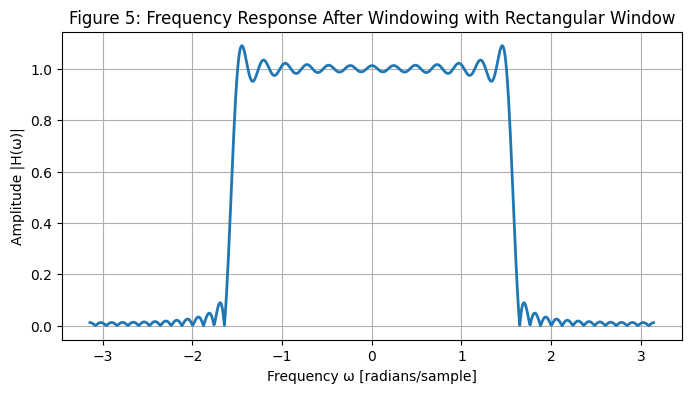

In [12]:
from scipy.fft import fft, fftshift

# Parameters
N = 51
n = np.arange(N)
omega_c = np.pi / 2

# Centered index
alpha = (N - 1) / 2
n_shifted = n - alpha

# Centered ideal impulse response
h_d = np.zeros_like(n_shifted)
h_d[n_shifted != 0] = np.sin(omega_c * n_shifted[n_shifted != 0]) / (np.pi * n_shifted[n_shifted != 0])
h_d[n_shifted == 0] = omega_c / np.pi

# Rectangular window
w = np.ones(N)

# Windowed impulse response
h = h_d * w

# Frequency response calculation
H = fft(h, 1024)
H_shifted = fftshift(H)
freqs = np.linspace(-np.pi, np.pi, len(H_shifted))

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(freqs, np.abs(H_shifted), linewidth=2)
plt.title('Figure 5: Frequency Response After Windowing with Rectangular Window')
plt.xlabel('Frequency ω [radians/sample]')
plt.ylabel('Amplitude |H(ω)|')
plt.grid(True)
plt.show()

reponse impulsionnelle

<ipython-input-4-d17af96a4495>:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h_from_freq, use_line_collection=True)


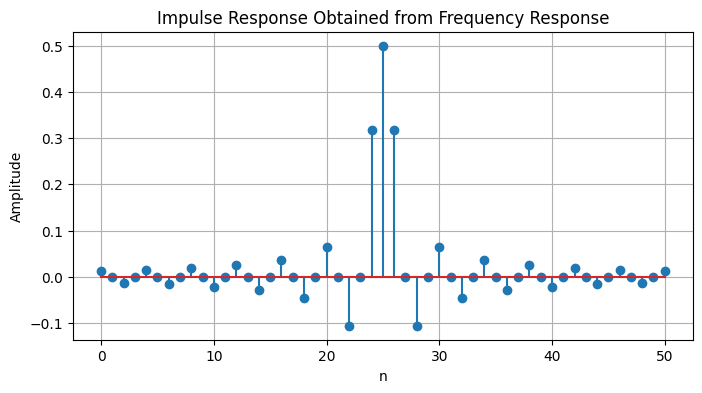

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifft

# Parameters
N = 51
n = np.arange(N)
omega_c = np.pi / 2

# Centered index
alpha = (N - 1) / 2
n_shifted = n - alpha

# Centered ideal impulse response
h_d = np.zeros_like(n_shifted)
h_d[n_shifted != 0] = np.sin(omega_c * n_shifted[n_shifted != 0]) / (np.pi * n_shifted[n_shifted != 0])
h_d[n_shifted == 0] = omega_c / np.pi

# Rectangular window
w = np.ones(N)

# Windowed impulse response
h = h_d * w

# Frequency response calculation
H = fft(h, 1024)

# Inverse FFT to obtain the impulse response from the frequency response
h_from_freq = ifft(H)

# Truncate to match the length of the original impulse response
h_from_freq = h_from_freq[:N].real

# Plotting the impulse response obtained from the frequency response
plt.figure(figsize=(8, 4))
plt.stem(n, h_from_freq, use_line_collection=True)
plt.title('Impulse Response Obtained from Frequency Response')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Dans un même endroit

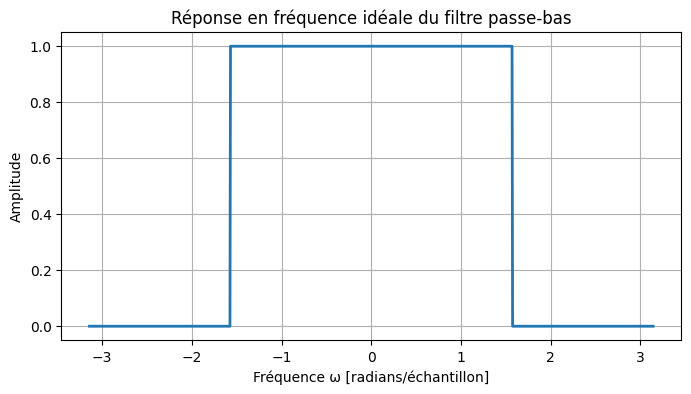

<ipython-input-2-3be35d6575ba>:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(M), h_d, use_line_collection=True)


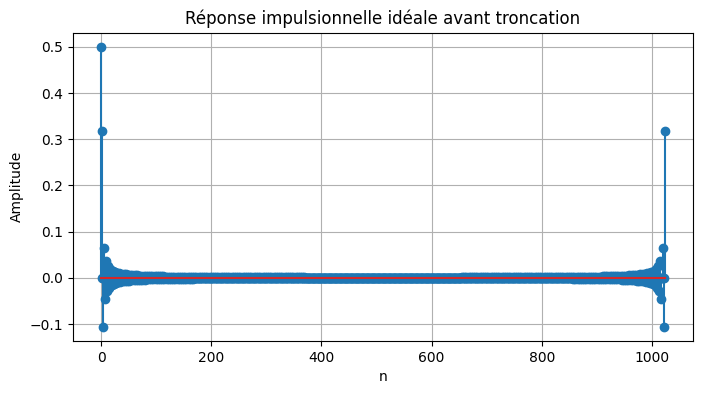

<ipython-input-2-3be35d6575ba>:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(N), h_truncated, use_line_collection=True)


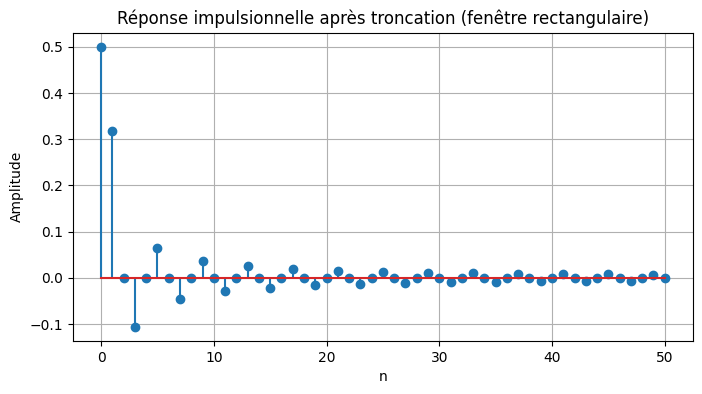

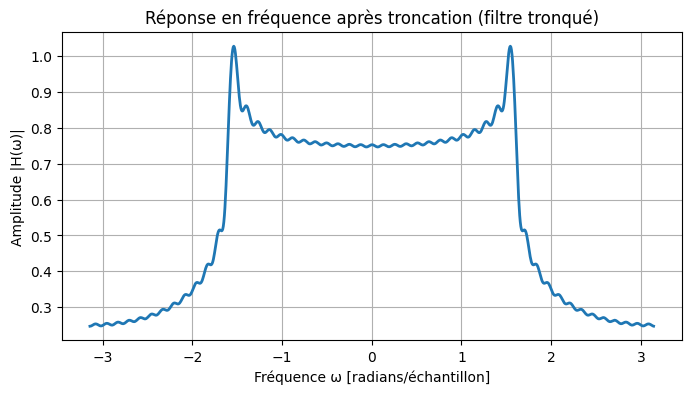

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft, fft, fftshift

# Paramètres de conception
N = 51  # Longueur de la réponse impulsionnelle après troncation
omega_c = np.pi / 2  # Fréquence de coupure du filtre passe-bas
M = 1024  # Nombre de points pour la réponse en fréquence (pour obtenir plus de détails)

# 1. Définir la réponse en fréquence idéale du filtre passe-bas
H_d = np.zeros(M)
omega = np.linspace(-np.pi, np.pi, M)

# Appliquer le masque de passe-bas idéal (fréquence de coupure)
H_d[np.abs(omega) <= omega_c] = 1

# Afficher la réponse en fréquence idéale
plt.figure(figsize=(8, 4))
plt.plot(omega, H_d, linewidth=2)
plt.title('Réponse en fréquence idéale du filtre passe-bas')
plt.xlabel('Fréquence ω [radians/échantillon]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 2. Appliquer la transformée de Fourier inverse pour obtenir la réponse impulsionnelle idéale
h_d = ifft(fftshift(H_d))  # Inverse FFT de la réponse en fréquence
h_d = np.real(h_d)  # On ne garde que la partie réelle

# Afficher la réponse impulsionnelle complète (avant troncation)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(M), h_d, use_line_collection=True)
plt.title('Réponse impulsionnelle idéale avant troncation')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 3. Tronquer la réponse impulsionnelle pour obtenir une longueur finie N
h_truncated = h_d[:N]  # Tronquer la réponse impulsionnelle à N points

# 4. Afficher la réponse impulsionnelle tronquée
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), h_truncated, use_line_collection=True)
plt.title('Réponse impulsionnelle après troncation (fenêtre rectangulaire)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 5. Calculer la réponse en fréquence du filtre tronqué
H_truncated = fftshift(np.abs(fft(h_truncated, M)))

# Afficher la réponse en fréquence du filtre après troncation
plt.figure(figsize=(8, 4))
plt.plot(omega, H_truncated, linewidth=2)
plt.title('Réponse en fréquence après troncation (filtre tronqué)')
plt.xlabel('Fréquence ω [radians/échantillon]')
plt.ylabel('Amplitude |H(ω)|')
plt.grid(True)
plt.show()
